In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore") # umap deprecation warnings related to numba do not concern us.

In [2]:
from pathlib import Path as path
import functools as fn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scboolseq.utils import parse_data_directory, parse_pickles
from scboolseq import scBoolSeq

from markers import (
    positive_markers, # function to generate a configuration dictionnary from a set of marker genes
    states_and_markers, # Dictionnary containing phenotypes and their marker genes
    marker_genes, # pandas.Series containing simply the name of markers
)

In [3]:
%ls *csv

dorothea_mouse_tfs.csv                pseudotime_inferred_observations.csv
GSE122466_Retina_vargenes_batch1.csv  scboolseq_inferred_observations.csv


In [4]:
data = pd.read_csv("GSE122466_Retina_vargenes_batch1.csv", index_col=0)
print(data.shape)
data.head()

(2673, 1650)


,Tubb3,Malat1,Stmn2,Fgf15,Gap43,Xist,Sncg,Hmgb2,Top2a,Meg3,...,Kif14,Etfb,Prdm13,Cd320,Odf2,Rpl24,Fam98b,Fbxo36,Pou4f2,Rbp4
Lane1_AAACCTGAGATGTCGG,0.000000,14.687273,9.280150,10.278990,0.000000,0.000000,8.282469,10.863565,8.282469,8.282469,...,0.0,0.000000,0.0,0.000000,0.000000,11.737682,0.000000,0.0,0.0,0.0
Lane1_AAACCTGCAATCCAAC,0.000000,14.568977,0.000000,10.200911,0.000000,0.000000,0.000000,10.200911,0.000000,0.000000,...,0.0,9.616560,0.0,0.000000,0.000000,10.615642,8.618397,0.0,0.0,0.0
Lane1_AAACCTGGTTCCTCCA,12.822128,16.422850,11.681013,0.000000,12.722607,0.000000,12.615708,0.000000,0.000000,11.237565,...,0.0,6.607977,0.0,0.000000,6.607977,9.402599,6.607977,0.0,0.0,0.0
Lane1_AAACCTGTCCAATGGT,12.601411,16.106194,10.514703,0.000000,8.517658,0.000000,8.517658,10.099994,0.000000,0.000000,...,0.0,0.000000,0.0,8.517658,0.000000,10.099994,0.000000,0.0,0.0,0.0
Lane1_AAACGGGAGGCAATTA,0.000000,14.858160,0.000000,12.375060,7.766719,11.082672,6.773328,11.889742,11.461031,7.766719,...,0.0,6.773328,0.0,0.000000,6.773328,11.284220,8.349471,0.0,0.0,0.0


In [5]:
obs_tags = pd.read_csv("pseudotime_inferred_observations.csv", index_col=0)
obs_tags.observation.value_counts()

observation
RPC      202
AC       107
NB1       79
RGC       68
Cones     65
NB2        7
Name: count, dtype: int64

In [6]:
%%time
scbool = scBoolSeq(
    dor_threshold=0.995, # To retain one of the markers
    confidence=.75 # To maximize binarization
)
scbool.fit(data)

CPU times: user 1min 39s, sys: 1.32 s, total: 1min 41s
Wall time: 18.8 s


scBoolSeqBinarizer(confidence=0.75, dor_threshold=0.995)

In [7]:
scbool.criteria_.Category.value_counts()

Category
Bimodal     853
ZeroInf     723
Unimodal     74
Name: count, dtype: int64

In [8]:
scbool.criteria_.loc[marker_genes, :].Category.value_counts()

Category
ZeroInf    12
Bimodal    10
Name: count, dtype: int64

In [9]:
%time bin_data = scbool.binarize(data)

CPU times: user 1.72 s, sys: 16 ms, total: 1.73 s
Wall time: 1.73 s


In [10]:
partial_bin_configs = bin_data[marker_genes]
partial_bin_configs.fillna('').head()

,Otx2,Thrb,Crx,Onecut2,Sstr2,Btg2,Fos,Pcdh17,Sox2,Elavl4,...,Top2a,Rbp4,Onecut1,Prox1,Hes1,Prc1,Penk,Neurod4,Pax6,Pou6f2
Lane1_AAACCTGAGATGTCGG,,,,0.0,,0.0,0.0,,1.0,0.0,...,1.0,,,,1.0,0.0,,,1.0,1.0
Lane1_AAACCTGCAATCCAAC,,,,0.0,,1.0,1.0,,,0.0,...,0.0,,,1.0,1.0,0.0,,,1.0,0.0
Lane1_AAACCTGGTTCCTCCA,,1.0,,0.0,,0.0,0.0,1.0,,1.0,...,0.0,,1.0,,0.0,0.0,,,1.0,1.0
Lane1_AAACCTGTCCAATGGT,,,,0.0,,1.0,0.0,,,0.0,...,0.0,,,,0.0,0.0,,,1.0,0.0
Lane1_AAACGGGAGGCAATTA,,,,0.0,,1.0,1.0,1.0,,0.0,...,1.0,,,,1.0,1.0,,,1.0,0.0


In [11]:
binarized_groups = {}
for obs, frame in obs_tags.groupby('observation'):
    binarized_groups.update({
        obs: bin_data.loc[frame.index, :]
    })

In [12]:
binarized_groups.keys()

dict_keys(['AC', 'Cones', 'NB1', 'NB2', 'RGC', 'RPC'])

### Aggregate groups via the mode

In [13]:
%%time
agg_obs_mode = []
for group_name, binarized_group in binarized_groups.items():
    _meta_bin = binarized_group.mode(dropna=False).loc[0, ].to_frame() # Only take the first mode, otherwise there can be multiple rows
    _meta_bin.columns = [group_name]
    agg_obs_mode.append(_meta_bin)
    
meta_mode = pd.concat(agg_obs_mode, axis=1).T

CPU times: user 2.49 s, sys: 16.4 ms, total: 2.51 s
Wall time: 2.5 s


In [14]:
for pheno, genes in states_and_markers.items():
    if pheno in meta_mode.index:
        print(pheno, "\t:\t", meta_mode.loc[pheno, list(genes)].to_dict())

RPC 	:	 {'Hes1': 1.0, 'Sox2': 1.0, 'Fos': 1.0}
NB1 	:	 {'Top2a': 1.0, 'Sstr2': nan, 'Btg2': 1.0, 'Penk': 1.0, 'Prc1': 1.0}
NB2 	:	 {'Neurod4': 1.0, 'Pcdh17': nan, 'Pax6': 1.0}
RGC 	:	 {'Pou4f2': 1.0, 'Elavl4': 1.0, 'Isl1': 1.0, 'Pou6f2': 1.0}
AC 	:	 {'Onecut2': 1.0, 'Prox1': nan}
Cones 	:	 {'Crx': 1.0, 'Rbp4': nan, 'Otx2': 1.0, 'Thrb': 1.0}


In [15]:
meta_mode[marker_genes].T

,AC,Cones,NB1,NB2,RGC,RPC
Otx2,NaN,1.0,1.0,NaN,NaN,NaN
Thrb,NaN,1.0,NaN,NaN,NaN,NaN
Crx,NaN,1.0,NaN,NaN,NaN,NaN
Onecut2,1.0,1.0,0.0,0.0,1.0,0.0
Sstr2,NaN,NaN,NaN,NaN,NaN,NaN
Btg2,0.0,1.0,1.0,1.0,0.0,0.0
Fos,0.0,0.0,0.0,0.0,0.0,1.0
Pcdh17,NaN,NaN,NaN,NaN,NaN,NaN
Sox2,NaN,NaN,NaN,NaN,NaN,1.0
Elavl4,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
null_var_mask = meta_mode.var(skipna=False) == 0
null_var_genes = meta_mode.columns[null_var_mask]

In [17]:
with open("mode_active_invariant_genes.txt", "w") as _active_genes, open("mode_inactive_invariant_genes.txt", "w") as _inactive_genes:
    _active_genes.write(f"Gene\n")
    _inactive_genes.write(f"Gene\n")
    for _gene, _val in meta_mode[null_var_genes].mode().T.itertuples(index=True):
        if _val:
            _active_genes.write(f"{_gene}\n")
        else:
            _inactive_genes.write(f"{_gene}\n")

In [18]:
print(meta_mode.shape)
#print(f"Removing {100*(meta_mode.var(skipna=False) == 0).mean():.2f}% of genes (because they zero variance)")
meta_mode_var = meta_mode #meta_mode[meta_mode.columns[~(meta_mode.var(skipna=False) == 0)]].copy(deep=True)
print(meta_mode_var.shape)
meta_mode_var.iloc[:, :10]

(6, 1650)
(6, 1650)


,Tubb3,Malat1,Stmn2,Fgf15,Gap43,Xist,Sncg,Hmgb2,Top2a,Meg3
AC,1.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Cones,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NB1,1.0,NaN,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
NB2,1.0,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
RGC,1.0,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
RPC,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [19]:
dorothea_db = pd.read_csv("dorothea_mouse_tfs.csv")
dorothea_db.columns = dorothea_db.columns[:-1].to_list() + ['sign']
dorothea_db.head()

,tf,confidence,target,sign
0,4932411N23Rik,E,Smad4,1
1,4932411N23Rik,E,0610030E20Rik,1
2,4932411N23Rik,E,1700017N19Rik,1
3,4932411N23Rik,E,4931428F04Rik,1
4,4932411N23Rik,E,4932438A13Rik,1


In [20]:
def in_db(frame: pd.DataFrame, db: pd.DataFrame):
    is_tf = frame.columns.isin(db.tf)
    is_target = frame.columns.isin(db.target)
    in_db = pd.Series(
        fn.reduce(np.logical_or, [is_tf, is_target]), 
        index=frame.columns
    )
    return in_db

In [21]:
in_db(meta_mode_var, dorothea_db).mean()

0.8987878787878788

In [22]:
in_db(meta_mode_var[marker_genes], dorothea_db).mean()

1.0

In [23]:
meta_mode_var[null_var_genes].columns[~in_db(meta_mode_var[null_var_genes], dorothea_db)]

Index(['Xist', 'Mir124a-1hg', 'Kcnq1ot1', 'Selk', 'Pold3', 'Gm26699', 'Hn1l',
       'Snhg9', 'AY036118', 'Gm42418', 'Zcchc11', 'BC003331', 'Gm26518',
       'sept.02', 'Rps18-ps3', 'Mum1', 'Prpf38b', 'Mesdc2'],
      dtype='object')

In [24]:
print(meta_mode_var.shape)
meta_mode_var_db = meta_mode_var[meta_mode_var.columns[in_db(meta_mode_var, dorothea_db)]]
print(meta_mode_var_db.shape)
meta_mode_var_db.iloc[:, :10]

(6, 1650)
(6, 1483)


,Tubb3,Stmn2,Fgf15,Gap43,Sncg,Hmgb2,Top2a,Ccnd1,Tubb2b,Ebf1
AC,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Cones,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
NB1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
NB2,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
RGC,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
RPC,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [25]:
meta_mode_var_db.T.isna().mean()

AC       0.469993
Cones    0.462576
NB1      0.450438
NB2      0.467970
RGC      0.458530
RPC      0.445718
dtype: float64

In [26]:
meta_mode_var_db.isna().mean().mean()

0.4592043155765341

In [27]:
import networkx as nx
from grn import *

In [28]:
dorothea_db.confidence.unique()

array(['E', 'D', 'B', 'A', 'C'], dtype=object)

In [29]:
# The whole grn is weakly connected if we consider all confidence levels
whole_grn = df_to_graph(dorothea_db.query("confidence != 'E' & confidence != 'D'"))
induced_grn = nx.induced_subgraph(whole_grn, meta_mode_var_db.columns)
len(whole_grn), len(induced_grn)

(5201, 622)

In [30]:
core_tf_nw = extract_largest_scc(whole_grn)
len(core_tf_nw)

157

In [31]:
prior_grn = nx.induced_subgraph(whole_grn, set(core_tf_nw).union(meta_mode_var_db.columns))
len(prior_grn)

749

In [32]:
nx.is_weakly_connected(prior_grn)

False

In [33]:
pkn_biggest_wcc = nx.subgraph(prior_grn, max(nx.weakly_connected_components(prior_grn), key=len))
len(pkn_biggest_wcc)

644

In [34]:
all(i in pkn_biggest_wcc for i in core_tf_nw)

True

In [35]:
marker_genes.isin(pkn_biggest_wcc).mean()

0.6363636363636364

In [36]:
import bonesis

In [37]:
def df_to_bonesis_data(df: pd.DataFrame):
    data = {}
    for config, genes in df.iterrows():
        data.update({config: genes.dropna().to_dict()})
    return data

In [38]:
data_meta_mode = df_to_bonesis_data(meta_mode_var_db) 
data_meta_mode.keys()

dict_keys(['AC', 'Cones', 'NB1', 'NB2', 'RGC', 'RPC'])

In [39]:
pkn = bonesis.domains.InfluenceGraph(
    pkn_biggest_wcc, maxclause=8, allow_skipping_nodes=True, canonic=False
)

In [40]:
bo = bonesis.BoNesis(pkn, data_meta_mode)
bo

In [44]:
import json
with open("mode_prior_grn.json", "w") as _prior_grn, open("mode_data_meta.json", "w") as _data:
    json.dump(nx.node_link_data(pkn), _prior_grn)
    json.dump(data_meta_mode, _data)

In [45]:
~bo.obs("RPC") >= ~bo.obs("NB1") >= ~bo.obs("NB2")
~bo.obs("NB2") >= bo.fixed(~bo.obs("Cones"))
~bo.obs("NB2") >= bo.fixed(~bo.obs("RGC"))
~bo.obs("NB2") >= bo.fixed(~bo.obs("AC"))
None

In [46]:
import datetime
from pathlib import Path as path
from scboolseq.utils import Timer

In [118]:
date = datetime.datetime.now()
bo.maximize_nodes()
bo.maximize_strong_constants()
view = bonesis.NonStrongConstantNodesView(bo, mode="optN")
view.standalone(
    output_filename=f"optim_dorothea_v2_mode_{date.strftime('%Y-%m-%d')}.sh"
)
print("Standalone shell file written", flush=True)

kept_nodes = {}
with Timer("Optimizing NonStrongConstantNodesView(bo, mode='optN')"):
    for kept_nodes in view:
        break

_replica_grn = nx.subgraph(prior_grn, kept_nodes)

Standalone shell file written
Grounding...done in 1.0s
<class 'bonesis0.gil_utils.BGIteratorPersistent'>
Optimizing NonStrongConstantNodesView(bo, mode='optN'): 5328.99843


In [119]:
len(kept_nodes)

243

In [120]:
marker_genes.isin(_replica_grn).mean()

0.3181818181818182

# computing graph layout...


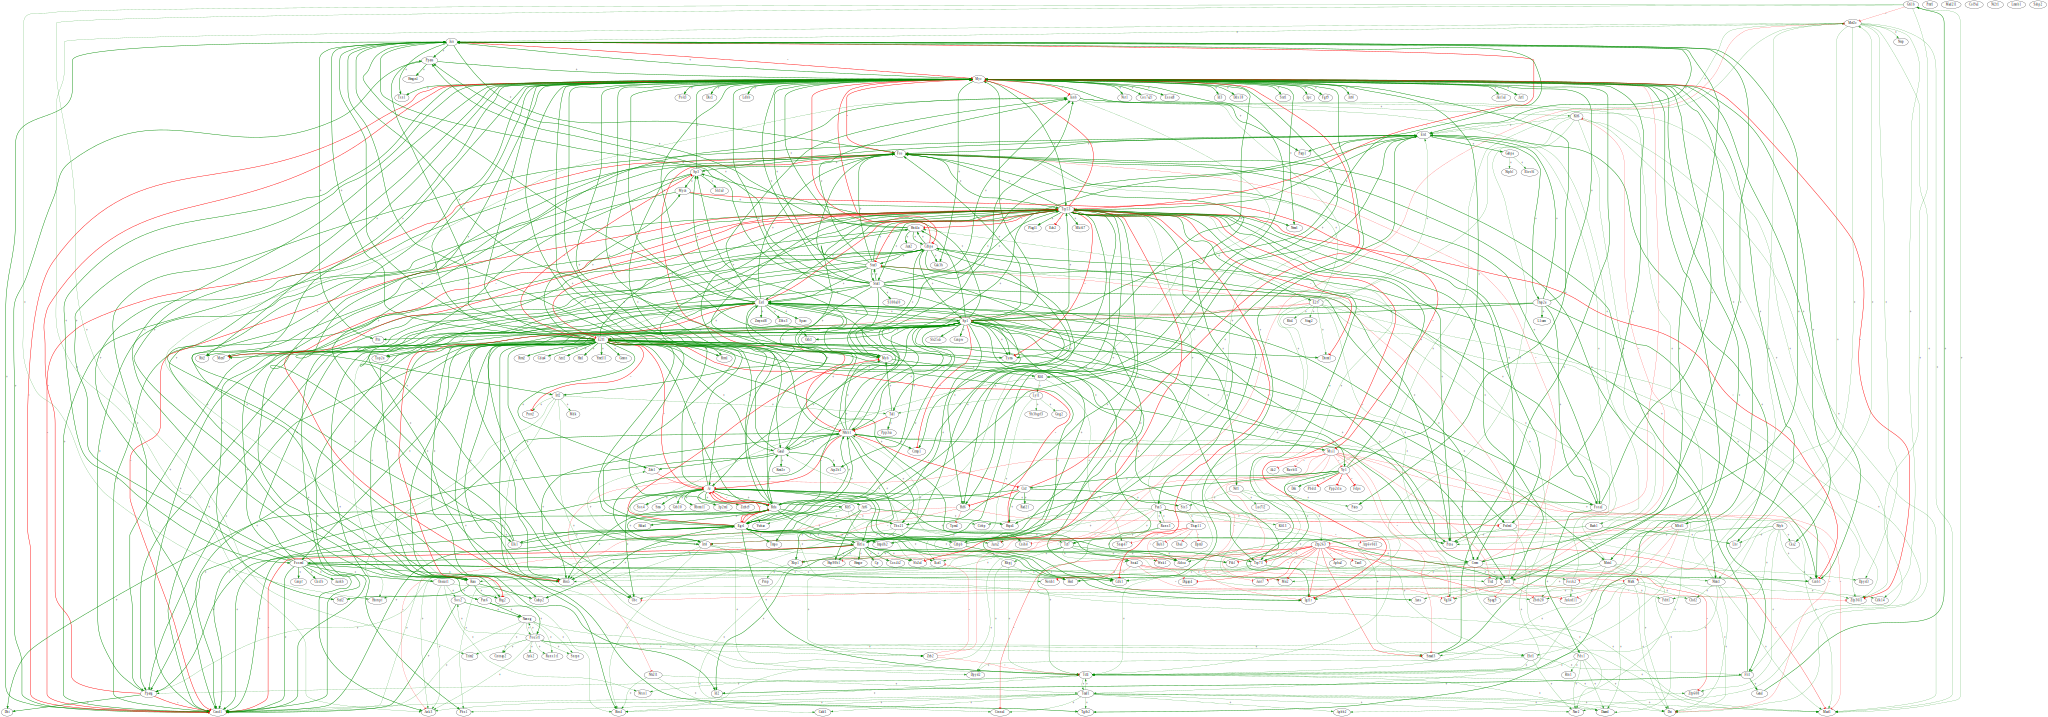

In [121]:
bonesis.InfluenceGraph(_replica_grn)

In [122]:
EXPORT = True

if EXPORT:
    nx.nx_pydot.write_dot(extract_largest_scc(bonesis.InfluenceGraph(_replica_grn)), "mode_grn_scc_v1.dot")
    import json
    with open("mode_grn_optimized_v1.json", "w") as f:
        json.dump(nx.node_link_data(_replica_grn), f)
    
    with open("mode_pkn_bonesis_obj_optimized_v1.json", "w") as f:
        json.dump(nx.node_link_data(bonesis.InfluenceGraph(_replica_grn)), f)
    print("Exported")
else:
    print("Not exported")

Exported
